# Análisis de Incidentes Viales en la CDMX con base en la información proporcionada por el C5

**Lenguaje de programación:** Python

**Equipo:** 11

**Integrantes:**

* Ximena Ávila Villagómez

* Ana Katherine Cuevas Flores

* Félix Alberto Nieto García

* Alejandro De Fuentes Martínez


## Índice de contenido
0. Librerias
1. Identificación del problema
2. Plantemiento de preguntas
3. Colección de datos
4. Análisis exploratorio de los datos
  
  4.1 Descripción general de los datasets
  
  4.2 Concatenación de los datasets

  4.3 Verificación de los datos
  
  4.4 Especificaciones generales para la limpieza

5. Limpieza de datos  

  5.1 Tranformación de datos

  5.2 Eliminación de NaNs

6. Procesamiento

  6.1 Frecuencias generales de los datos categoricos

  6.2 Accidentes afirmativos y su clasificación

  6.3 Accidentes afirmativo por delegacion 

  6.4 Accidentes afirmativo por año

  6.5 infomación de accidentes por delegaciónes  un mes y año en particular

  6.6 Serie de tiempo de accidentes afirmativos

7. APIs

  7.1 Delimitación territorial de las 16 alcaldías de la Ciudad de México

  7.2 Mapa interactivo de accidentes 
8. Conclusiones

9. Planes a futuro



_____________________________________________________________________________

## 0. Librerias

In [1]:
#Manejo y adquisición de datos
import pandas as pd #Manejo de dataframes
import numpy as np #Manejo de arreglos númericos y funciones de calculo
import json #Menjo de archivos json
import requests #Hacer que las solicitudes HTTP

#Graficación
import matplotlib.pyplot as plt #Graficación de datos
from IPython.display import display #Funciones de visualización en interfaz
from ipywidgets import interact, interactive # Funciones interactivas HTML widgets para Jupyter notebooks
import folium  # Visualización de datos en mapas interactivos
import folium.plugins #Herramientas para mapas interactivos


## 1. Identificación del problema

## 2. Plateamiento de preguntas




1. ¿Cuáles son los principales tipos de accidentes que se han registrado como incidentes viales por el C5 de la CDMX?

2. ¿Cómo se distribuyen los incidentes con código A acontecidos en las Alcaldías de la CDMX?

3. ¿Cuáles son los tres tipos de accidentes más comunes en cada una de las alcaldías de la CDMX?

4. ¿En qué año acontecieron la mayor cantidad de accidentes con código A (Afirmativos)?

5. ¿Cómo se distribuyen los accidentes con código A (Afirmativos) por año en las Alcaldías de la CDMX?

6. ¿Cuál es la proporción entre falsas alarmas y accidentes realmente acontecidos?

## 3. Colección de datos

El Centro de Comando, Control, Cómputo, Comunicaciones y Contacto Ciudadano  ( [C5](https://www.c5.cdmx.gob.mx/dependencia/acerca-de/el-c5-de-la-cdmx)) de la Ciudad de México es la dependencia del Gobierno de la Ciudad de México encargada de captar información para la toma de decisiones en la capital del país a través del video monitoreo, de la captación de llamadas telefónicas y de aplicaciones informáticas de inteligencia.

Conjunto de datos corresponde a los [incidentes viales](https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5) reportados por el  C5 de la CDMX desde 2014 hasta el 2021 y actualizado mensualmente. Se recolectaron dos datasets correspondientes a los años 2014-2020 y 2021 en la página de [datos abiertos de la ciudad de méxico](https://datos.cdmx.gob.mx).

In [2]:
#Se cargan los datos desde el link directo
link_21 = "https://datos.cdmx.gob.mx/dataset/a6d1d483-65d2-4ed9-9687-1932eb0cf70f/resource/c6b0fe65-137c-40d6-99c9-6c527f9b29c4/download/___.csv"
link_14_20 = "https://archivo.datos.cdmx.gob.mx/incidentes-viales-c5.csv"
data_21 = pd.read_csv(link_21)
data_14_20 = pd.read_csv(link_14_20)

### **Información**

El portal de datos abiertos proporciona un diccionario sobre el contenido de los datasets, en el se reporta una descripción de las columnas y el significado de cada una de ellas.

1. **Folio** (campo llave): \\
Código único alfa numérico que se la asigna a cada uno de los incidentes que son generados, está compuesto por dos iniciales del Centro que recibió la emergencia, fecha en formato AA/MM/DD y número consecutivo de ingreso, ejemplo: AO/181201/10801

2. **Fecha de creación**: \\
Fecha de apertura del folio del evento, DD/MM/AAAA

3. **Hora de creación**: \\
Hora de apertura del folio del evento, HH:MM:SS

4. **Día de la semana**: \\
Día de apertura del folio,Lunes-Domingo

5. **Fecha de cierre**: \\
Fecha de cierre del folio del evento,DD/MM/AAAA

6. **Hora de cierre**: \\
Hora de cierre del folio del evento, HH:MM:SS

7. **Incidente**: \\
Tipo de incidente reportados.
* accidente-: choque con lesionados, choque con prensados, choque sin lesionados, ciclista,ferroviario,monopatín,motociclista,otros,persona atrapada/ desbarrancada,vehiculo atrapado,vehiculo atrapado-varado,vehiculo desbarrancado,volcadura
* cadáver-: accidente automovilístico,atropellado
* detención: ciudadana-accidente automovilístico, ciudadana-atropellado
* lesionado-atropellado
* sismo-: choque con lesionados, choque con prensados,choque sin lesionados, persona atropellada
* mi ciudad-:calle-incidente de tránsito, taxi-incidente de tránsito ruta-incidente de tránsito

8. **Alcaldía de inicio del incidente**: \\
Una de las 16 alcaldías que constituyen la Ciudad de México

9. **Latitud**: \\
Referencia geográfica aproximada de la ubicación del incidente

10. **Longitud**: \\
Referencia geográfica aproximada de la ubicación del incidente

11. **Código de cierre**:
Código que fue asignado al incidente en el cierre
* Afirmativo(A)- Una unidad de atención a emergencias confirmó la emergencia reportada
* Informativo	(I) -	Solicitud de información
* Negativo	(N) -	Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie confirmo la emergencia ni fue solicitado el apoyo de la unidad
* Duplicado	(D)-	El incidente reportado se registró en dos o más ocasiones procediendo a mantener un solo reporte como el original.
* Falso (F)-	El incidente reportado inicialmente fue considerado como falso en el lugar de los hechos.


12. **Clasificación**: \\
Clasificación del incidente
* Emergencia	
* Urgencias Médicas	
* Falsa Alarma
* Delito

13. **Tipo de entrada**: \\
Medio por el cual se dio aviso del incidente

* BOTÓN DE AUXILIO
* CÁMARA
* LLAMADA APP911
* LLAMADA DEL 911
* RADIO
* REDES
* APLICATIVOS

14. **Alcaldía de cierre del incidente**: \\
Alcaldía donde cierra el folio del incidente. Una de las 16 alcaldías que constituyen la Ciudad de México

## 4. Análisis exploratorio de los datos

Cualquier dataset contiene porblemas de recolección de datos y más si son datos recolectados a lo largo de muchos años y por diferentes personas, que es el caso de C5, el cual opera las 24 horas, los 365 días del año.  Por ello a través del análisis exploratorio se puede determinar que tipo de problemas existen en el dataset. 

### 4.1 Observación general de los datasets

In [3]:
#Se imprime en pantalla el tamaño de los dos datasets
print(f" Datos \t  (filas,columnas) \n  2021      {data_21.shape}\n 2014-2020  {data_14_20.shape} ")

 Datos 	  (filas,columnas) 
  2021      (12947, 17)
 2014-2020  (1412333, 19) 


In [4]:
#Se muestran una cantidad de registros 
print(f"Datos del 2014-2020 \n \nColumna {' '*8} Tipo de dato \n{'-'*28} \n",
      data_14_20.dtypes,"\n \n Muestra de registros: \n")
data_14_20.head(5)

Datos del 2014-2020 
 
Columna          Tipo de dato 
---------------------------- 
 id                     int64
folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
ano                    int64
mesdecierre           object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object 
 
 Muestra de registros: 



id            folio  ...                  geopoint mes
0   0  GA/160123/05714  ...      19.422113,-99.084643   1
1   1  AO/160123/05826  ...       19.35832,-99.297641   1
2   2  C4/160124/02187  ...     19.21707,-99.21907008   1
3   3  C4/160124/05723  ...  19.32057999,-99.24100992   1
4   4  C4/160124/01334  ...  19.45289997,-99.21587004   1

[5 rows x 19 columns]

In [5]:
#Se muestran una cantidad de registros 
print(f"Datos del 2021 \n \nColumna {' '*8} Tipo de dato \n{'-'*28} \n",
      data_21.dtypes,"\n \n Muestra de registros: \n")
data_21.head(5)


Datos del 2021 
 
Columna          Tipo de dato 
---------------------------- 
 Unnamed: 0             int64
folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
fecha_cierre          object
hora_cierre           object
incidente_c4          object
delegacion_inicio     object
latitud              float64
longitud             float64
codigo_cierre         object
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
ano                    int64
mes                    int64
dtype: object 
 
 Muestra de registros: 



Unnamed: 0            folio fecha_creacion  ...  delegacion_cierre   ano mes
0           1  C5/210201/04663     01/02/2021  ...  GUSTAVO A. MADERO  2021   2
1           2  C5/210201/00391     01/02/2021  ...  GUSTAVO A. MADERO  2021   2
2           3  C5/210201/03815     01/02/2021  ...     MIGUEL HIDALGO  2021   2
3           4  C5/210201/02068     01/02/2021  ...           COYOACAN  2021   2
4           5  C5/210201/03832     01/02/2021  ...            TLALPAN  2021   2

[5 rows x 17 columns]

In [6]:
# Columnas en común
columnas_data_14_20 = list(data_14_20.columns)
columnas_data_21 = list(data_21.columns)

columnas_en_comun = list(filter(lambda valor: valor in columnas_data_14_20,columnas_data_21))

print(f"Se tienen {len(columnas_en_comun)} columnas en común:\n")
columnas_en_comun

Se tienen 16 columnas en común:



['folio',
 'fecha_creacion',
 'hora_creacion',
 'dia_semana',
 'fecha_cierre',
 'hora_cierre',
 'incidente_c4',
 'delegacion_inicio',
 'latitud',
 'longitud',
 'codigo_cierre',
 'clas_con_f_alarma',
 'tipo_entrada',
 'delegacion_cierre',
 'ano',
 'mes']

### 4.2 Concatenación de los datasets

In [7]:
#Se eligen las columnas en común
data_14_20 = data_14_20[columnas_en_comun]
data_21 = data_21[columnas_en_comun]

In [8]:
#Construimos un vector con el nombre de las columnas en el orden que queremos mostrar
orden = ['folio', 'ano', 'mes','dia_semana',
         'incidente_c4','codigo_cierre','latitud', 'longitud',
         'tipo_entrada','clas_con_f_alarma',
         'delegacion_inicio','delegacion_cierre',
         'fecha_creacion', 'hora_creacion', 
        'fecha_cierre', 'hora_cierre']

In [9]:
#se reordenadan las columnas
data_21 = data_21[orden]
data_14_20 = data_14_20[orden]

In [10]:
#concatenación de los datos
data = pd.concat([data_14_20,data_21] ,axis=0)

In [11]:
#Se imprime en pantalla el tamaño de los dos datasets
print(f" Datos \t  (filas,columnas) \n  2014-2021      {data.shape}")

 Datos 	  (filas,columnas) 
  2014-2021      (1425280, 16)


In [12]:
# Se muestra información del dataset completo
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425280 entries, 0 to 12946
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   folio              1425280 non-null  object 
 1   ano                1425280 non-null  int64  
 2   mes                1425280 non-null  int64  
 3   dia_semana         1425280 non-null  object 
 4   incidente_c4       1425280 non-null  object 
 5   codigo_cierre      1425280 non-null  object 
 6   latitud            1424837 non-null  float64
 7   longitud           1424845 non-null  float64
 8   tipo_entrada       1425280 non-null  object 
 9   clas_con_f_alarma  1425280 non-null  object 
 10  delegacion_inicio  1425119 non-null  object 
 11  delegacion_cierre  1425137 non-null  object 
 12  fecha_creacion     1425280 non-null  object 
 13  hora_creacion      1425280 non-null  object 
 14  fecha_cierre       1425280 non-null  object 
 15  hora_cierre        1425278 non-nul

###  4.3 Verificación de los datos
  

Se busca información sobre los NaNs que se encuentra en el dataset completo a lo largo de las columnas y de las filas. Por otra parte se describe un método para determinar si existen problemas en la recolección de datos.

In [13]:
#Se muestran los NaNs a lo largo de las columnas 
print(f"Distribución de NaNs del 2014-2021 \n \nColumna {' '*10} Cantidad \n{'-'*28} \n",
      data.isna().sum())

Distribución de NaNs del 2014-2021 
 
Columna            Cantidad 
---------------------------- 
 folio                  0
ano                    0
mes                    0
dia_semana             0
incidente_c4           0
codigo_cierre          0
latitud              443
longitud             435
tipo_entrada           0
clas_con_f_alarma      0
delegacion_inicio    161
delegacion_cierre    143
fecha_creacion         0
hora_creacion          0
fecha_cierre           0
hora_cierre            2
dtype: int64


In [14]:
#Se muestran la frecuencia de de NaNs 
print(f"Distribución de NaNs del 2014-2021 por fila \n \nNo.Nans No. filas \n{'-'*16} \n",
      data.isna().sum(axis=1).value_counts())


Distribución de NaNs del 2014-2021 por fila 
 
No.Nans No. filas 
---------------- 
 0    1424671
2        575
1         34
dtype: int64


**Errores en la adquisición de datos**

Los datos tiene una cierta estructura pero al ser una grande el dataset es imposible revisar si cada uno de los datos sigue esa convención, entonces se plantea la siguiente pregunta ¿Cómo saber si se existen valores erroneos? 


*Para datos categoricos*

* Obtener un listado de lo valores diferentes dentro de la columna. Si tenemos un dato diferente a nuestra categoria, significa que existen errores en la recolección de los datos. Por ejemplo:  'incidente_c4','codigo_cierre','delegacion_inicio','delegacion_cierre', 'tipo_entrada','clas_con_f_alarma','ano', 'mes','dia_semana'

*Para datos que tienen un formato especifico:*

* Convertir cada fila de una columna a string y obtener su longitud, de está manera si tenemos datos diferente a la moda, significa que esos datos tienen un formato diferente.  Por ejemplo: 'folio','fecha_creacion', 'hora_creacion', 'fecha_cierre', 'hora_cierre'


In [15]:
years = sorted(data['ano'].unique())
month = sorted(data['mes'].unique())
day = sorted(data['dia_semana'].unique())

years,month,day

([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 ['Domingo', 'Jueves', 'Lunes', 'Martes', 'Miércoles', 'Sábado', 'Viernes'])

In [16]:
tipo_accidente = sorted(data['incidente_c4'].unique())
print(f"Tenemos {len(tipo_accidente)} tipos diferentes de accidentes:\n")
tipo_accidente

Tenemos 26 tipos diferentes de accidentes:



['Detención ciudadana-accidente automovilístico',
 'accidente-choque con lesionados',
 'accidente-choque con prensados',
 'accidente-choque sin lesionados',
 'accidente-ciclista',
 'accidente-ferroviario',
 'accidente-monopatín',
 'accidente-motociclista',
 'accidente-otros',
 'accidente-persona atrapada / desbarrancada',
 'accidente-vehiculo atrapado',
 'accidente-vehiculo desbarrancado',
 'accidente-vehículo atrapado-varado',
 'accidente-volcadura',
 'cadáver-accidente automovilístico',
 'cadáver-atropellado',
 'detención ciudadana-accidente automovilístico',
 'detención ciudadana-atropellado',
 'lesionado-accidente automovilístico',
 'lesionado-atropellado',
 'mi ciudad-calle-incidente de tránsito',
 'mi ciudad-taxi-incidente de tránsito',
 'sismo-choque con lesionados',
 'sismo-choque con prensados',
 'sismo-choque sin lesionados',
 'sismo-persona atropellada']

In [17]:
#Tipo de entrada 
tipo_entrada = sorted(data['tipo_entrada'].unique())
print(f"Tenemos {len(tipo_entrada)} tipos de entradas\n")
tipo_entrada

Tenemos 9 tipos de entradas



['APLICATIVOS',
 'BOTÓN DE AUXILIO',
 'CÁMARA',
 'LLAMADA APP911',
 'LLAMADA DEL 066',
 'LLAMADA DEL 911',
 'RADIO',
 'REDES',
 'ZELLO']

In [18]:
#Tipo de entrada 
clase_alarma = sorted(data['clas_con_f_alarma'].unique())
print(f"Tenemos {len(clase_alarma)} clases de alarma:\n")
clase_alarma

Tenemos 4 clases de alarma:



['DELITO', 'EMERGENCIA', 'FALSA ALARMA', 'URGENCIAS MEDICAS']

In [19]:
#Delegacion
delegaciones_cierre = data['delegacion_cierre'].unique()
delegaciones_inicio = data['delegacion_inicio'].unique()
print(f"Tenemos {len(delegaciones_inicio)} delegaciones inicio y {len(delegaciones_cierre)} de cierre")
delegaciones_cierre,delegaciones_inicio

Tenemos 17 delegaciones inicio y 17 de cierre


(array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
        'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
        'TLAHUAC', 'ALVARO OBREGON', 'CUAUHTEMOC', 'COYOACAN',
        'IZTAPALAPA', 'BENITO JUAREZ', 'AZCAPOTZALCO', 'IZTACALCO',
        'MILPA ALTA', 'XOCHIMILCO', nan], dtype=object),
 array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
        'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
        'TLAHUAC', 'CUAUHTEMOC', 'COYOACAN', 'IZTAPALAPA', 'BENITO JUAREZ',
        'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON',
        'XOCHIMILCO', nan], dtype=object))

In [20]:
#Códigos de cierre del accidente
codigo_accidente = sorted(data['codigo_cierre'].unique())
print(f"Tenemos {len(codigo_accidente)} tipos de codigo:\n")
codigo_accidente

Tenemos 10 tipos de codigo:



['(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
 '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
 '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
 '(I) El incidente reportado es afirmativo y se añade información adicional al evento',
 '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
 'A',
 'D',
 'F',
 'I',
 'N']

**Nota:** En los datos categoricos se encontró
 problema en la columna de código de cierre y en la delegación de inicio.

In [21]:
#Función para calcular la longitud en formato string de algún dato
def conteo_catacteres(entrada):
  return len(str(entrada))

In [22]:
data['folio'].apply(conteo_catacteres).value_counts()

15    1425280
Name: folio, dtype: int64

In [23]:
data['fecha_creacion'].apply(conteo_catacteres).value_counts()

10    1316233
8      109047
Name: fecha_creacion, dtype: int64

In [24]:
data['fecha_cierre'].apply(conteo_catacteres).value_counts()

10    1316233
8      109047
Name: fecha_cierre, dtype: int64

**Nota**:Se observa que tenemos dos longitudes de fechas, entonces esto nos dice que tenemos dor formatos de fechas dentro de nuestra columna, DD/MM/AAAA y DD/MM/AA.

In [25]:
data['hora_creacion'].apply(conteo_catacteres).value_counts()

8     1396967
7       26781
11       1398
10        116
9          16
6           1
4           1
Name: hora_creacion, dtype: int64

In [26]:
data['hora_cierre'].apply(conteo_catacteres).value_counts()

8     1396156
7       27596
11       1389
10        119
9          15
6           3
3           2
Name: hora_cierre, dtype: int64

**Nota**: En las horas tenemos una gran distribución de vales, el más común es el valor de 8 y 7 digitos, esto puede corresponder al formato HH:MM:SS o H:MM:SS. ¿Pero que pasa con los demás? 

Para poder contestar la pregunta se hace una selección de los datos que tiene un alongitud diferente de 7 y 8 para las dos columnas. 

In [27]:
a = data['hora_creacion'].apply(conteo_catacteres)
b = data['hora_cierre'].apply(conteo_catacteres)

In [28]:
c = data[((a!=7) & (a!=8) & (b!=7) & (b!=8) )]

In [29]:
c[['folio','hora_creacion','hora_cierre']].head()

folio hora_creacion  hora_cierre
1022794  C5/200218/07180   0.812789352   0.88400463
1022796  C5/200218/06999   0.797581019  0.924421296
1022797  C5/200218/02094   0.391805556  0.557881944
1022798  C5/200218/04831   0.629861111  0.919722222
1022799  C5/200218/02675   0.443819444  0.575601852

**Nota:** Los datos que diferentes corresponden a datos float.

### 4.4 Especificaciones generales para la limpieza

1. Se observó que en la columna de cierre se registraron los datos en dos formatos diferetes. Se debe de corregir al formato que muestra sólo una letra.
2. Se tienen dos formatos para la fecha de creación:DD/MM/AAAA y DD/MM/AA. Se debe de normalizar el formato para todos los datos. 
3. Las columnas de hora de creación y hora de cierre contiene datos tipo float. Entonce se debe de eliminar las columnas.
4. Existen valores NaNs distribuidos dentro de las columnas: latitud,longitud,delegación de inicio y delegación de cierre. Se deben de eliminar las filas que contienen un NaN.
5. Se debe de reiniciar los indices
6. Borrar las columnas de hora de cierre y creación porque no aportan información relevente para nuestros análisis.

## 5. Limpieza de datos

De acuerdo a los parametros de limpieza mencionados anterioremente, se comenzó con la tranformación de datos a las columnas hora de creación y cierre y la correción del codigo de cierre. Se puede comenzar con esto ya que no se encontre ningún valor NaN en estas columnas, entonces se asegura que en la tranformación no se presentara ningún problema.

### 5.1 Tranformación de datos

In [30]:
#Se elimnan las columas de hora
data = data.drop(columns=['hora_creacion','hora_cierre'])

In [31]:
#Se tinene diferentes longitudes para el codigo de cierre
data['codigo_cierre'].apply(conteo_catacteres).value_counts()

119    610165
185    509009
150    277350
1       12947
258     10702
83       5107
Name: codigo_cierre, dtype: int64

**Nota:** Se observa la distribución de longitudes del codigo de cierre para odeterminar que el resto de los códigos que no tienen una descripción se encuentren en otrden. Si tuvieran errores entonces encontrariamos valores con longuitud 2 o mayor. Entoneces podemos realizar una función para extraer el código de toda la columna.

In [32]:
#se selecciona 1 como identificador para los valores que si son correctos
def cambio_codigo(entrada):
  if len(entrada)!=1:
    return entrada[1]
  else:
    return entrada

In [33]:
#Se realiza una correción en el codigo de cierre para el dataframe 2014-2021
data["codigo_cierre"] = data["codigo_cierre"].apply(cambio_codigo)

In [34]:
#verificación
data["codigo_cierre"].unique()

array(['A', 'N', 'D', 'F', 'I'], dtype=object)

In [35]:
#pd.to_datetime(data['fecha_creacion'],infer_datetime_format=True)

In [36]:
#Se tranforma en formato fecha 
import datetime as dt
def convertir_fecha(fecha):
  try:
    return dt.datetime.strptime(fecha, "%d/%m/%Y")
  except ValueError:
    return dt.datetime.strptime(fecha, "%d/%m/%y")

In [37]:
data['fecha_creacion']= data['fecha_creacion'].apply(convertir_fecha)
data['fecha_cierre']= data['fecha_cierre'].apply(convertir_fecha)

### 5.2 Eliminación de NaNs

In [38]:
#Se obtiene los indices de las filas que tienen por lo menos un nan y las que no tienen ninguno
index_data_nan = (data.isna().sum(axis=1) != 0 )
index_data_clear = (data.isna().sum(axis=1) == 0)

In [39]:
data_clear = data[index_data_clear]
data_nan = data[index_data_nan]

#Para obtener el data_clear es equivalente usar 
#data_clear = data.dropna(how='any') 

In [40]:
data_clear=data_clear.reset_index(drop=True)
data_nan=data_nan.reset_index(drop=True)

In [41]:
#Se imprime en pantalla el tamaño de los dos datasets
print(f" Datos \t       (filas,columnas) \n  2014-2021      {data_clear.shape}")

 Datos 	       (filas,columnas) 
  2014-2021      (1424673, 14)


In [42]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424673 entries, 0 to 1424672
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   folio              1424673 non-null  object        
 1   ano                1424673 non-null  int64         
 2   mes                1424673 non-null  int64         
 3   dia_semana         1424673 non-null  object        
 4   incidente_c4       1424673 non-null  object        
 5   codigo_cierre      1424673 non-null  object        
 6   latitud            1424673 non-null  float64       
 7   longitud           1424673 non-null  float64       
 8   tipo_entrada       1424673 non-null  object        
 9   clas_con_f_alarma  1424673 non-null  object        
 10  delegacion_inicio  1424673 non-null  object        
 11  delegacion_cierre  1424673 non-null  object        
 12  fecha_creacion     1424673 non-null  datetime64[ns]
 13  fecha_cierre       1424673 

In [43]:
#diferencia entre el número de filas original y el número de final sin contar lasfilas que contienen un NaN
print(f'''El número de filas borradas es {data_nan.shape[0]}, correspondiente a un {round(data_nan.shape[0]/data.shape[0],4)*100} %
de los datos originales.''')

El número de filas borradas es 607, correspondiente a un 0.04 %
de los datos originales.


In [44]:
data_clear.to_csv('datos_limpios.csv')

## 6. Procesamiento

In [45]:
#Función para realizar un grafico de barras
def graf_bar(x,y,titulo):
  plt.bar(x,y)
  plt.title(titulo)
  plt.ylabel("Frecuencia")
  plt.xticks(rotation=90)

In [46]:
# Función para mostrar el porcentaje de una columna espeficia de un dataframe
def mostrar(dataframe,name,n=4):
  valores = dataframe.sort_values(name,ascending=False)
  valores['porcentaje']= ((valores/valores.sum())*100).round(n)
  return valores

### 6.1 Frecuencias generales de los datos categoricos


Se realiza un proceso para obtener la frecuencia de todos los valores posibles para cada uno de los datos categoricos y se vizualiza el resultado mediante una grafico de barras.

In [47]:
# Información sobre las frecuencias de los datos limpios
columnas_categoricas = [ 'ano', 'mes', 'dia_semana', 'incidente_c4', 'codigo_cierre','tipo_entrada', 
            'clas_con_f_alarma','delegacion_inicio', 'delegacion_cierre']

In [48]:
#Se calculas las frecuencias y se guardan en un diccionario
frecuencias_generales = {}
for i in columnas_categoricas:
   frecuencias_generales [i] = data_clear[i].value_counts()

In [49]:
#Función interactiva para visualizar la información de cada categoria
@interact
def mostrar_valores(column = columnas_categoricas):
  x = frecuencias_generales[column].index
  y = frecuencias_generales[column].values
  data = pd.DataFrame(frecuencias_generales[column])
  display(graf_bar(x,y,f"Histograma de accidetes por {column}"))
  display(mostrar(data,column))

interactive(children=(Dropdown(description='column', options=('ano', 'mes', 'dia_semana', 'incidente_c4', 'cod…

### 6.2 Accidentes afirmativos y su clasificación


Se realiza una agrupación de los datos a través código de cierre y e tipo de accidente. Después se toma los que tiene código A y se obtiene los porcentajes de cada tipo de accidente.

In [50]:
group_5 = data_clear.groupby(['codigo_cierre','incidente_c4']).size()
mostrar(pd.DataFrame(group_5['A'],columns=['frecuencia']),'frecuencia')

frecuencia  porcentaje
incidente_c4                                                         
accidente-choque sin lesionados                    348310     56.6781
accidente-choque con lesionados                    131631     21.4194
lesionado-atropellado                               84471     13.7454
accidente-motociclista                              23445      3.8150
accidente-volcadura                                 12361      2.0114
lesionado-accidente automovilístico                  3297      0.5365
accidente-persona atrapada / desbarrancada           3186      0.5184
accidente-otros                                      1630      0.2652
cadáver-atropellado                                  1561      0.2540
accidente-ciclista                                   1467      0.2387
cadáver-accidente automovilístico                    1025      0.1668
accidente-vehiculo atrapado                           515      0.0838
accidente-choque con prensados                        442      0.0719
accidente-vehículo atrapado-varado                    409      0.0666
sismo-choque sin lesionados                           203      0.0330
detención ciudadana-atropellado                       194      0.0316
accidente-vehiculo desbarrancado                      183      0.0298
sismo-choque con lesionados                           121      0.0197
detención ciudadana-accidente automovilístico          43      0.0070
accidente-ferroviario                                  17      0.0028
accidente-monopatín                                    16      0.0026
sismo-persona atropellada                               8      0.0013
mi ciudad-calle-incidente de tránsito                   5      0.0008
sismo-choque con prensados                              1      0.0002

### 6.3 Accidentes afirmativo por delegacion 


Se realiza una agrupación de corigo de cierre y delegación de inicio. Con ello se puede selecciónar el código A y obtener los porcentajes para cada una de las delegaciones.

In [51]:
group_1 = data_clear.groupby(['codigo_cierre','delegacion_inicio']).size()

In [52]:
#Accidentes clasificados por delegacion
mostrar(pd.DataFrame(group_1['A'],columns=['frecuencia']),'frecuencia')

frecuencia  porcentaje
delegacion_inicio                          
IZTAPALAPA                88375     14.3807
CUAUHTEMOC                73606     11.9774
GUSTAVO A. MADERO         66632     10.8426
MIGUEL HIDALGO            53390      8.6878
BENITO JUAREZ             50937      8.2886
COYOACAN                  47791      7.7767
VENUSTIANO CARRANZA       44435      7.2306
ALVARO OBREGON            42239      6.8733
TLALPAN                   35745      5.8165
AZCAPOTZALCO              28634      4.6594
IZTACALCO                 26688      4.3428
XOCHIMILCO                20304      3.3039
TLAHUAC                   14493      2.3583
CUAJIMALPA                 9711      1.5802
MAGDALENA CONTRERAS        7989      1.3000
MILPA ALTA                 3572      0.5812

In [53]:
#Codigo de cierre
codigo_accidente = list(frecuencias_generales['codigo_cierre'].index)
codigo_accidente

['A', 'D', 'N', 'F', 'I']

In [54]:
#Función interactiva para observar la ditrbución de incidentes  en cada delegación con diferente tipo de codigo
@interact
def mostrar_valores(codigo = codigo_accidente ):
  x = group_1[codigo].index
  y = group_1[codigo].values
  display(graf_bar(x,y,f"codigo de cierre {codigo} por alcaldia"))

interactive(children=(Dropdown(description='codigo', options=('A', 'D', 'N', 'F', 'I'), value='A'), Output()),…

### 6.4 Accidentes afirmativo por año


Se realiza una agrupación por codigo de cierre y por año para obtener el número de indcidentes afirmativos a lo largo de los años.

In [55]:
group_6 = data_clear.groupby(['codigo_cierre','ano']).size()

mostrar(pd.DataFrame(group_6['A'],columns=['frecuencia']),'frecuencia')

frecuencia  porcentaje
ano                         
2014      138456     22.5300
2015      109668     17.8455
2016       77489     12.6092
2017       75961     12.3606
2018       75927     12.3551
2019       75606     12.3028
2020       56915      9.2614
2021        4519      0.7353

### 6.5 infomación de accidentes por delegaciónen  un mes y año en particular


Se realiza una agrupación por codigo de ceirre, año, mes y delegación para realizar una grafica interactiva y mostrar la distribución de incidentes por alcaldia en un mes y año especifico.

In [56]:
group_2 = data_clear.groupby(['codigo_cierre','ano','mes','delegacion_inicio']).size()

In [57]:
year = list(frecuencias_generales['ano'].index)
month = list(frecuencias_generales['mes'].index)

In [58]:
year,month

([2018, 2019, 2017, 2016, 2015, 2014, 2020, 2021],
 [10, 12, 11, 2, 8, 9, 3, 6, 7, 5, 1, 4])

In [59]:
#Grafica interactiva
@interact
def mostrar_valores(codigo = codigo_accidente,
                    year=year,
                    mes =month):
  try: 
    x = group_2[codigo][year][mes].index
    y = group_2[codigo][year][mes].values
    display(graf_bar(x,y,f"codigo {codigo} en el año {year} y en el mes {mes}"))
  except KeyError:
    display(print("No se tienen datos de la selección"))

interactive(children=(Dropdown(description='codigo', options=('A', 'D', 'N', 'F', 'I'), value='A'), Dropdown(d…

### 6.6 Serie de tiempo de accidentes afirmativos

Se realizó una agrupación por codigo de ciere y fecha de creación, de está forma obtenemos una serie de tiempo que sirve para observar la tendencia de los accidentes.

In [60]:
group_3 = data_clear.groupby(['codigo_cierre','fecha_creacion']).size()

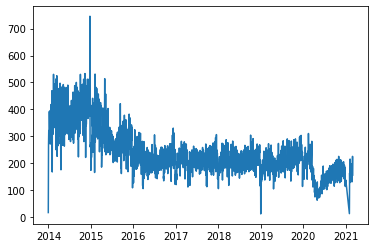

In [61]:
plt.plot(group_3['A'].index,group_3['A'].values)

In [62]:
data_time = data_clear[['fecha_creacion','longitud','latitud']]

In [63]:
data_time = data_time.sort_values('fecha_creacion',ascending=True)

In [64]:
data_time = data_time.set_index('fecha_creacion',drop=True)

In [65]:
fechas = sorted(data_clear['fecha_creacion'].unique())

## 7. APIs

### 7.1 Delimitación territorial de las 16 alcaldías de la Ciudad de México.

In [66]:
#dirección para realizar la consulta
link = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=e4a9b05f-c480-45fb-a62c-6d4e39c5180e'  

In [67]:
#Se reliza la consulta y se obtiene el estatus
r = requests.get(link)
r.status_code

200

In [68]:
consulta = r.json()

In [69]:
#Se normaliza la consulta 
D = pd.json_normalize(consulta['result']['records'])

In [70]:
r.close()

In [71]:
#Se tranforma en dataframe
df = pd.DataFrame.from_dict(D)

In [72]:
#se tranforma la columna en diccionario
df['geo_shape'] = df['geo_shape'].apply(lambda x: json.loads(x))

In [73]:
#Se separa y se tranforma el geo point a tipo float
df[['x','y']] = df['geo_point_2d'].str.split(',',expand=True).astype(float)

In [74]:
#Se elimina las columnas rebundantes
df = df.drop(columns=['_id','id','geo_point_2d'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nomgeo     16 non-null     object 
 1   cve_mun    16 non-null     int64  
 2   cve_ent    16 non-null     int64  
 3   cvegeo     16 non-null     int64  
 4   geo_shape  16 non-null     object 
 5   municipio  16 non-null     int64  
 6   x          16 non-null     float64
 7   y          16 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ KB


In [76]:
df.to_csv('poligono_delegacions.csv')

### 7.2 Mapa interactivo de accidentes 

El siguiente mapa se muestra el límite territorial de las 16 delegaciones de la ciudad de México. 

In [77]:
#Se crea un mapa para añadir información
centro = [19.432566, -99.133195]
Tmap =['Stamen Terrain','CartoDB Positron','Mapbox', ]
mapa_cdmx = folium.Map(location= centro, tiles=Tmap[1],
                       zoom_start=10,prefer_canvas=True,
                       max_zoom=11,min_zoom=9)

In [78]:
#Se añaden los poligonos de las delegaciones al mapa
for x in df.index:
  geo_j = folium.GeoJson(data=df['geo_shape'].loc[x],name=df['nomgeo'].loc[x],
                            style_function=lambda feature: { #'fillColor': 'blue',
          'color' : 'blue', 'weight' : 1, 'fillOpacity' : 0,} )
  geo_j.add_to(mapa_cdmx) 

  etiqueta = f"Numero: {df['municipio'].loc[x]}  Nombre: {df['nomgeo'].loc[x]} Coordenadas: {df['x'].loc[x],df['y'].loc[x]}"
  folium.Marker(location=df[['x','y']].loc[x],popup= etiqueta,
                icon=folium.Icon(color='blue', icon='info-sign')).add_to(mapa_cdmx)

In [79]:
mapa_cdmx

In [80]:
#Se guarda el mapa en formato html
mapa_cdmx.save(outfile= "alcaldias.html")

En los siguientes dos mapas  desea mostrar el poder de la herramienta Folium y su aplicación a la visualización de los datos obtenidos. Realizando un filtrado de información para un año y un mes en especifico, despupes se crea una grafica de calor y un cluster. Ambos nos sirven par rerpesentar la información en su mejor forma.

In [81]:
#Selecciona un mes y el año de interes
ano= 2021
mes = 5

In [82]:
#se selecciona los datos con codigo afirmativo
data_A = data_clear[data_clear['codigo_cierre'] == 'A' ]

In [83]:
#se filtra datos del año especifico
data_ano = data_A[data_A['ano'] == ano]

In [84]:
# se filtran datos del mes elegido
data_mes = data_ano[data_ano['mes']==mes]

In [85]:
#se obteiene una lista de todos los puntos
locations =list(zip(data_ano['latitud'],data_ano['longitud']))

In [86]:
#numero de puntos a graficar
len(locations)

4519

Mapa de calor

In [87]:
#Se crea un mapa para añadir información
centro = [19.432566, -99.133195]
Tmap =['Stamen Terrain','CartoDB Positron','Mapbox', ]
mapa_accidentes = folium.Map(location= centro, tiles=Tmap[1],
                       zoom_start=10,prefer_canvas=True,max_zoom=15,min_zoom=9)

In [88]:
#Se añaden los poligonos de las delegaciones al mapa
for x in df.index:
  geo_j = folium.GeoJson(data=df['geo_shape'].loc[x],name=df['nomgeo'].loc[x],
                            style_function=lambda feature: { #'fillColor': 'blue',
          'color' : 'blue', 'weight' : 1, 'fillOpacity' : 0,} )
  geo_j.add_to(mapa_accidentes) 

In [89]:
#Se realiza el mapa de calor y se añade
folium.plugins.HeatMap(locations).add_to(mapa_accidentes)

In [90]:
#folium.map.LayerControl('topleft', collapsed= False).add_to(folium.map.LayerControl('topleft', collapsed= False).add_to(mapa_accidentes))

In [91]:
mapa_accidentes

In [92]:
#se cuarda el mapa en formato html
mapa_accidentes.save(outfile= f"accidentes_{ano}_{mes}_heatmap.html")

Mapa cluster

In [93]:
#Punto donde se centra el mapa
centro = [19.432566, -99.133195]
Tmap =['Stamen Terrain','CartoDB Positron','Mapbox', ]
mapa_cluster = folium.Map(location= centro, tiles=Tmap[1],
                       zoom_start=10,prefer_canvas=True,max_zoom=15,min_zoom=9)

In [94]:
#Se añaden los poligonos de las delegaciones al mapa
for x in df.index:
  geo_j = folium.GeoJson(data=df['geo_shape'].loc[x],name=df['nomgeo'].loc[x],
                            style_function=lambda feature: { #'fillColor': 'blue',
          'color' : 'blue', 'weight' : 1, 'fillOpacity' : 0,} )
  geo_j.add_to(mapa_cluster) 

In [95]:
#folium.map.LayerControl('topleft', collapsed= False).add_to(folium.map.LayerControl('topleft', collapsed= False).add_to(mapa_cluster))

In [96]:
#se realiza un cluster de las coordenadas
marker_cluster=folium.plugins.MarkerCluster(locations)

In [97]:
# se añade al mapa
marker_cluster.add_to(mapa_cluster)

In [98]:
mapa_cluster

In [99]:
#Se guarda el mapa
mapa_cluster.save(outfile= f"Accidentes_A_{ano}_cluster.html")

## 8. Conslusiones

## 9. Planes a futuro

Se plantea relacionar los accidentes reportados con el C5 con otro tipo de información recopilada en la página de [datos abiertos de la ciudad de méxico](https://datos.cdmx.gob.mx). Buscar patrones y relaciónes de los accidentes con otro tipo datos geogragraficos como lo son:

1. Altas de riesgo de precipitacion, suceptibilidad por laderas, fracturas y grietas de suelo

2. Localizacipon de las estaciones y terminales del sistema de transporte unificado (metro, metrobus, microsbuses)

3. Vías primarias de la ciudad de México

4. Ubicacion de escuelas, hospitales, centros de salud y mercados

5. Índice de desarrollo social en la ciudad.

6. Infracciones de transito

El objetivo es cruzar información entre datasets  con ayuda de métodos estaísticos y de machinelearning para dar explicación a los accidentes, logrando así una base para proporner solciones.
